# **Black Friday Dataset (EDA & Preprocessing)**



## **`Problem Statement`**
A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Load The Dataset**

In [4]:
df = pd.read_csv("C:/Users/Awais/Downloads/BlackFridaySales.csv")
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
393289,1000541,P00053342,F,18-25,4,C,3,0,1,2.0,4.0,4254
142090,1003916,P00019142,M,26-35,4,A,2,1,11,15.0,NaN,4637
219478,1003833,P00286742,M,26-35,1,B,2,0,1,16.0,NaN,15470
519126,1001916,P00110842,M,46-50,7,B,0,0,1,2.0,5.0,11396
479780,1001873,P00265242,M,36-45,7,B,2,0,5,8.0,NaN,1961


## **Data Understanding**

In [5]:
df.shape

(550068, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

In [7]:
df.describe().round(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.00,550068.00,550068.00,550068.00,376430.00,166821.00,550068.00
mean,1003028.84,8.08,0.41,5.40,9.84,12.67,9263.97
std,1727.59,6.52,0.49,3.94,5.09,4.13,5023.07
min,1000001.00,0.00,0.00,1.00,2.00,3.00,12.00
25%,1001516.00,2.00,0.00,1.00,5.00,9.00,5823.00
50%,1003077.00,7.00,0.00,5.00,9.00,14.00,8047.00
75%,1004478.00,14.00,1.00,8.00,15.00,16.00,12054.00
max,1006040.00,20.00,1.00,20.00,18.00,18.00,23961.00


## **Checking_missing_values**

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df.isnull().sum()/df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% missing values in the `Product_Category_2` and 69% missing values in the `Product_Category_3`

Text(0.5, 1.0, 'Missing Values Heatmap')

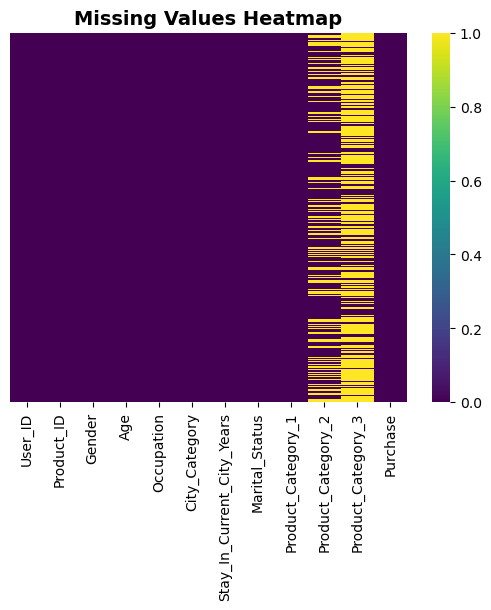

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,  cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')

In [11]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop `User_ID` and `Product_ID` for model prediction as it has more unique values.

In [12]:
df.duplicated().sum()

np.int64(0)

# **Perform EDA**

## **Target Variable Purchase**

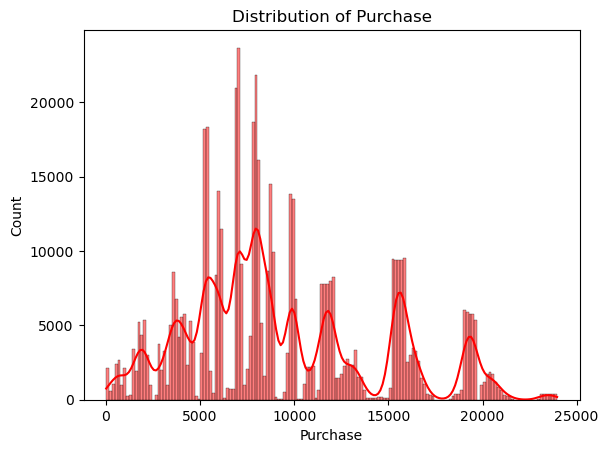

In [13]:
sns.histplot(df['Purchase'], kde=True,color='r')
plt.title("Distribution of Purchase")
plt.show()


Slightly right skewed distribution.

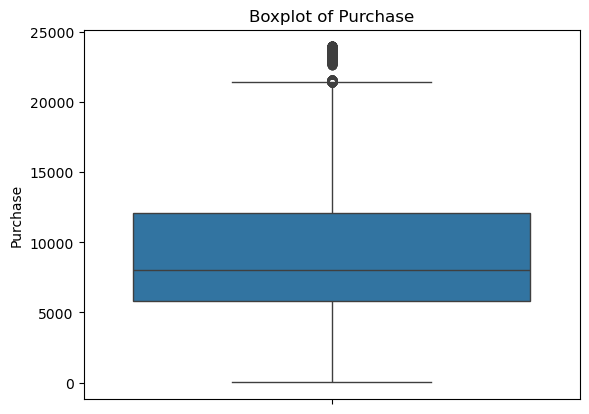

In [14]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [15]:
df["Purchase"].skew()

np.float64(0.6001400037087126)

In [16]:
df["Purchase"].kurtosis()

np.float64(-0.3383775655851724)

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

### **Gender**

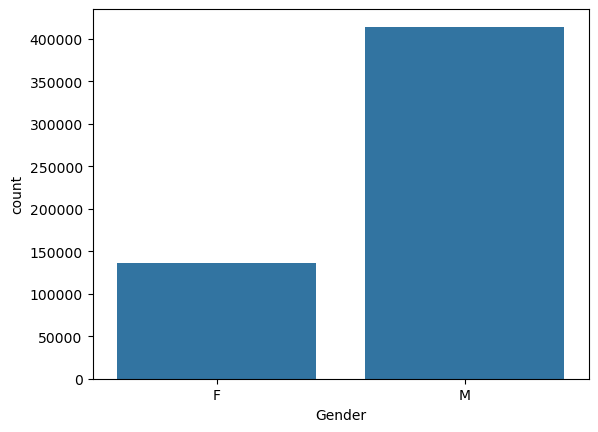

In [17]:
sns.countplot(x='Gender', data=df)
plt.show()

In [18]:
df['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

Majority customers are male

In [19]:
df.groupby("Gender")["Purchase"].mean()


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

on average male spends more moneyon purchase than female

### **Marital Status**

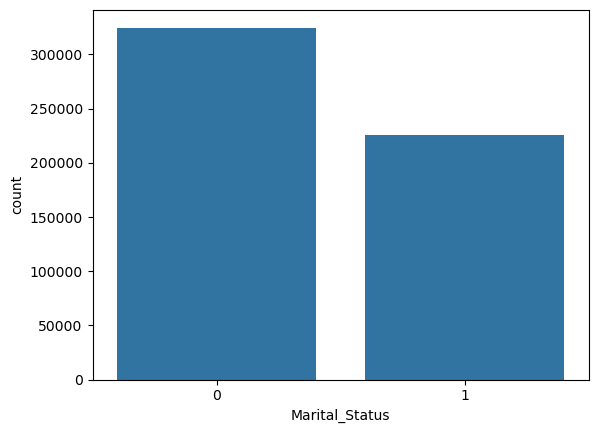

In [20]:
sns.countplot(x='Marital_Status',data=df)
plt.show()

purchase amount of unmarried is high

In [21]:
df.groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

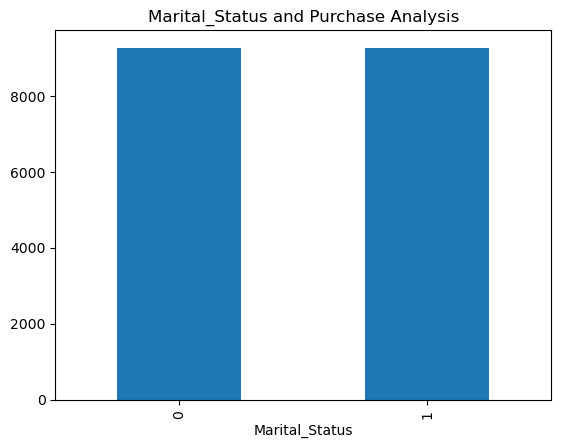

In [22]:
df.groupby("Marital_Status")["Purchase"].mean().plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

The average purchase amount of married and unmarried people are the same.

### City_Category

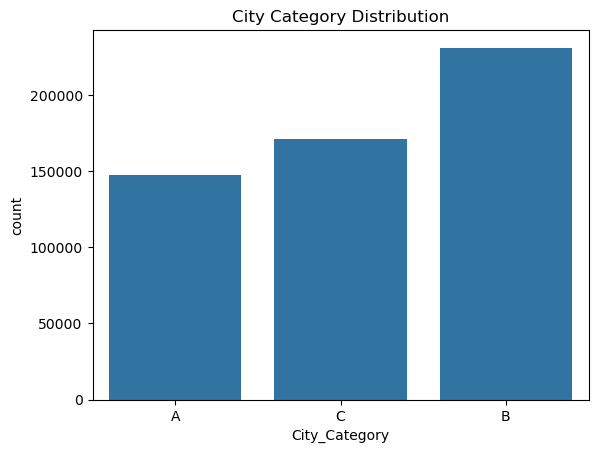

In [23]:
sns.countplot(x="City_Category", data=df)
plt.title("City Category Distribution")
plt.show()

City category B has made the most number of puchases.Category C also has strong presence.

## **Age**

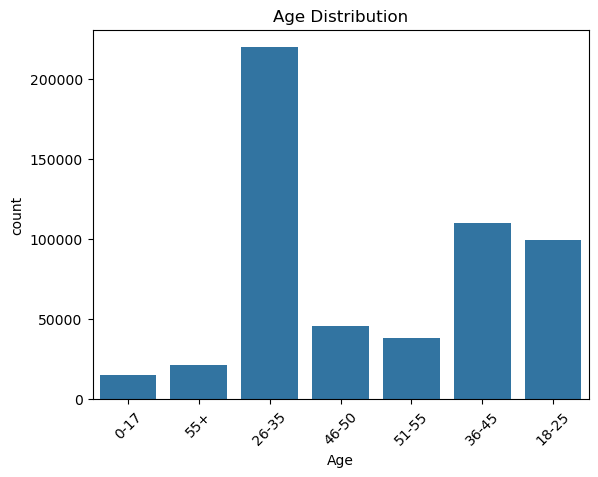

In [24]:
sns.countplot(x="Age", data=df)
plt.xticks(rotation=45)
plt.title("Age Distribution")
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.
Very few customers are 0–17.

# **Bivariate Analysis**

### **Gender vs Purchase**

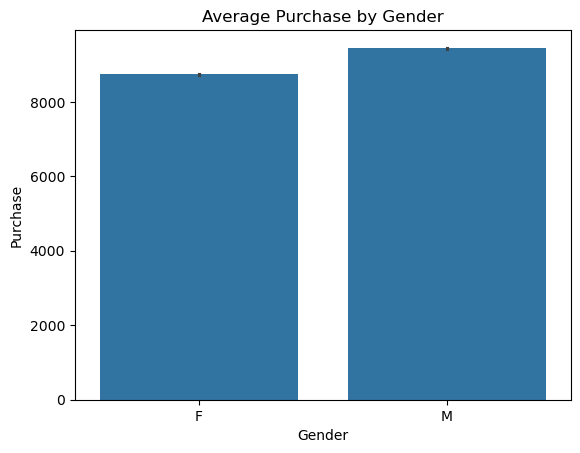

In [25]:
sns.barplot(x="Gender", y="Purchase", data=df)
plt.title("Average Purchase by Gender")
plt.show()

Males spend more on average than females.

Gender influences spending behavior.

### **Age vs Purchase**

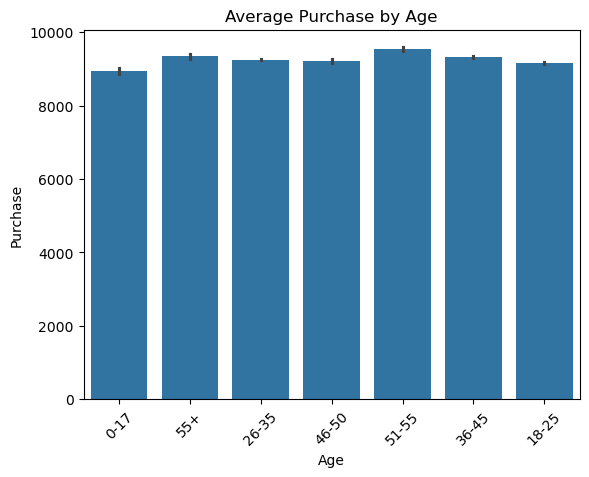

In [26]:
sns.barplot(x="Age", y="Purchase", data=df)
plt.xticks(rotation=45)
plt.title("Average Purchase by Age")
plt.show()

Age group 26–35 has highest average purchase.Younger customers spend less.

## **Occupation vs Purchase**

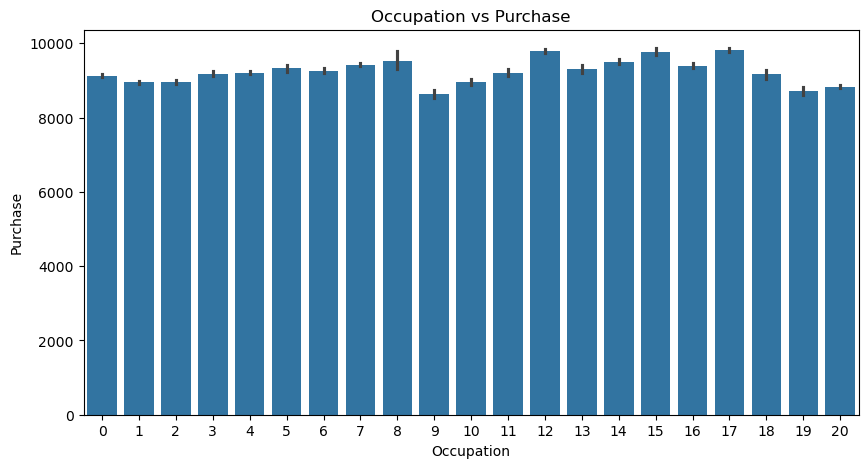

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x="Occupation", y="Purchase", data=df)
plt.title("Occupation vs Purchase")
plt.show()

Some occupations show much higher purchasing power.

# **Multivariate Analysis**

### **Correlation Heatmap**

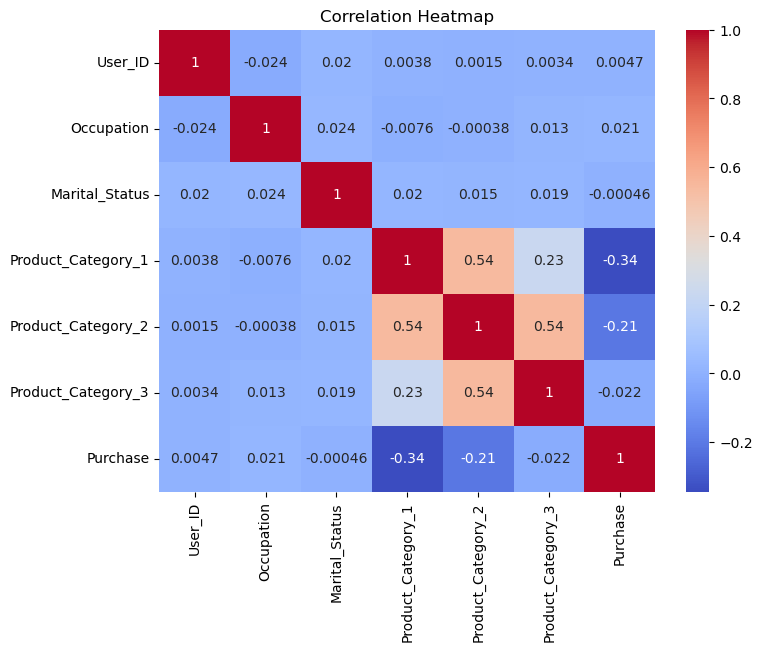

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Product categories slightly influence purchase.

No extremely high correlation between features.

No strong multicollinearity problem.

### **Outlier Detection**

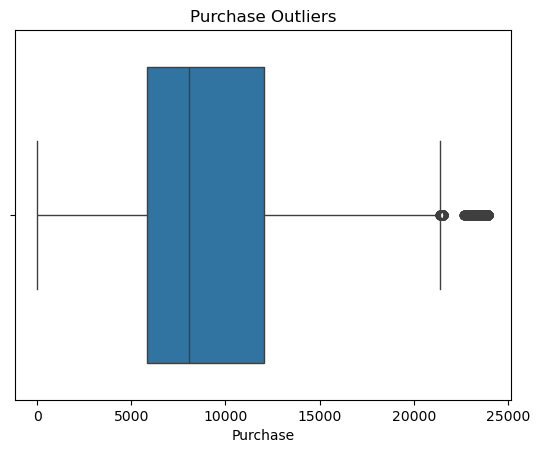

In [29]:
sns.boxplot(x=df["Purchase"])
plt.title("Purchase Outliers")
plt.show()

In [30]:
Q1 = df["Purchase"].quantile(0.25)
Q3 = df["Purchase"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
# Apply capping to handle outliers
df["Purchase"] = np.where(
    df["Purchase"] > upper_bound,
    upper_bound,
    df["Purchase"]
)

df["Purchase"] = np.where(
    df["Purchase"] < lower_bound,
    lower_bound,
    df["Purchase"]
)

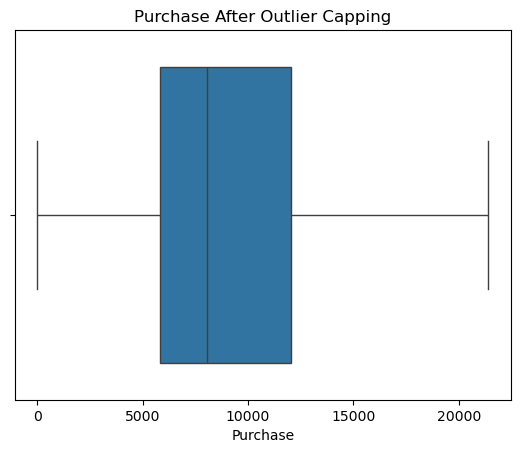

In [32]:
sns.boxplot(x=df["Purchase"])
plt.title("Purchase After Outlier Capping")
plt.show()

In [33]:
# drop unnecessary columns
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)

### **Handle misising vales**

In [34]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].median(), inplace=True)
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('int64')

C:\Users\Awais\AppData\Local\Temp\ipykernel_16108\3501562289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace=True)
C:\Users\Awais\AppData\Local\Temp\ipykernel_16108\3501562289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

use median to impute missing values beacuse they can not affect the distribution 

In [35]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## **Encoding**

In [36]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df[['Gender']].head()

,Gender
0,0
1,0
2,0
3,0
4,1


use label encoder because gender have only 2 categories thats why label encoder is best

In [37]:
# One-Hot Encoding for City_Category
df = pd.get_dummies(df, columns=['City_Category'], drop_first=True)


In [38]:
# ordinal encoding for Age
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})



In [39]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0,1,10,2,0,3,9,14,8370.0,False,False
1,0,1,10,2,0,1,6,14,15200.0,False,False
2,0,1,10,2,0,12,9,14,1422.0,False,False
3,0,1,10,2,0,12,14,14,1057.0,False,False
4,1,7,16,4+,0,8,9,14,7969.0,False,True


In [40]:
#ordinal encoding for stay in current city years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [41]:
df['City_Category_B'] = df['City_Category_B'].astype(int)
df['City_Category_C'] = df['City_Category_C'].astype(int)

In [42]:
df['Purchase'] = df['Purchase'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   Stay_In_Current_City_Years  550068 non-null  int64
 4   Marital_Status              550068 non-null  int64
 5   Product_Category_1          550068 non-null  int64
 6   Product_Category_2          550068 non-null  int64
 7   Product_Category_3          550068 non-null  int64
 8   Purchase                    550068 non-null  int64
 9   City_Category_B             550068 non-null  int64
 10  City_Category_C             550068 non-null  int64
dtypes: int64(11)
memory usage: 46.2 MB


## **Feature Scaling**

**Standard Scaling**

In [57]:
num_cols = [
    'Age', 
    'Stay_In_Current_City_Years', 
    'Product_Category_1', 
    'Product_Category_2', 
    'Product_Category_3'
]

#### **Train_test_split**

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train[num_cols])

# Transform train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [60]:
import numpy as np
np.round(X_train[num_cols].describe(), 1)
np.round(X_train_scaled[num_cols].describe(), 1)

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
count,385047.0,385047.0,385047.0,385047.0,385047.0
mean,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.8,-1.4,-1.1,-1.8,-4.5
25%,-0.4,-0.7,-1.1,-0.4,0.2
50%,-0.4,0.1,-0.1,-0.1,0.2
75%,0.4,0.9,0.7,1.0,0.2
max,2.6,1.7,3.7,2.0,1.9


StandardScaler was applied to normalize numerical features so that all variables contribute equally to the model and improve its performance.